# Test resampling the spectograms to the begin and and of the day

In [1]:
# Imports
from os import makedirs
from os.path import join
from time import time

from utils_basic import SPECTROGRAM_DIR as outdir, GEO_STATIONS as stations
from utils_basic import day2suffix, get_geophone_days, get_geo_metadata
from utils_preproc import read_and_process_day_long_geo_waveforms
from utils_spec import assemble_spec_filename, create_geo_spectrogram_file, write_geo_spectrogram_block, finish_geo_spectrogram_file
from utils_torch import get_daily_geo_spectrograms
from utils_plot import plot_geo_stft_spectrograms

In [2]:
# Inputs
station = "A01"
day = "2020-01-10"
window_length = 60.0 # IN SECONDS
overlap = 0.0
downsample = True
downsample_factor = 60 # Downsample factor for the frequency axis

if not downsample and save_ds_only:
    raise ValueError("Conflicting options for downsampling!")

In [3]:
# Load the station metadata
metadata = get_geo_metadata()

In [4]:
# Compute the frequency intervals
freq_interval = 1.0 / window_length
freq_interval_ds = freq_interval * downsample_factor

In [5]:
# Read and preprocess the data
stream_day = read_and_process_day_long_geo_waveforms(day, metadata, stations = station)
if stream_day is None:
    print(f"{day} is skipped.")

Reading the waveforms for 2020-01-10
Preprocessing the waveforms...


In [6]:
# Compute the spectrograms
stream_spec, stream_spec_ds = get_daily_geo_spectrograms(stream_day, window_length = window_length, overlap = overlap, downsample = downsample, downsample_factor = downsample_factor)

Computing the spectrograms...
(59956000, 60000, 60000, 1000)
(59956000, 60000, 60000, 1000)
(59956000, 60000, 60000, 1000)
Resampling the spectrograms to the begin and end of the day...
2020-01-10 00:00:00+00:00
2020-01-10 23:59:00+00:00
2020-01-10 00:00:00+00:00
2020-01-10 23:59:00+00:00
2020-01-10 00:00:00+00:00
2020-01-10 23:59:00+00:00
Downsampling the spectrograms...


In [7]:
stream_spec[0].data

array([[           nan,            nan,            nan, ...,
        4.41979653e+15, 4.42259294e+15, 4.42250039e+15],
       [           nan,            nan,            nan, ...,
        1.22703726e+06, 1.22801439e+06, 1.22710446e+06],
       [           nan,            nan,            nan, ...,
        3.74867336e-02, 6.68101678e-02, 5.62739840e-01],
       ...,
       [           nan,            nan,            nan, ...,
        5.19427516e-06, 7.70428297e-06, 1.85359635e-07],
       [           nan,            nan,            nan, ...,
        7.52487578e-06, 2.18358728e-05, 3.23875569e-05],
       [           nan,            nan,            nan, ...,
        4.95271834e+03, 7.70039451e+03, 4.52204871e+04]])

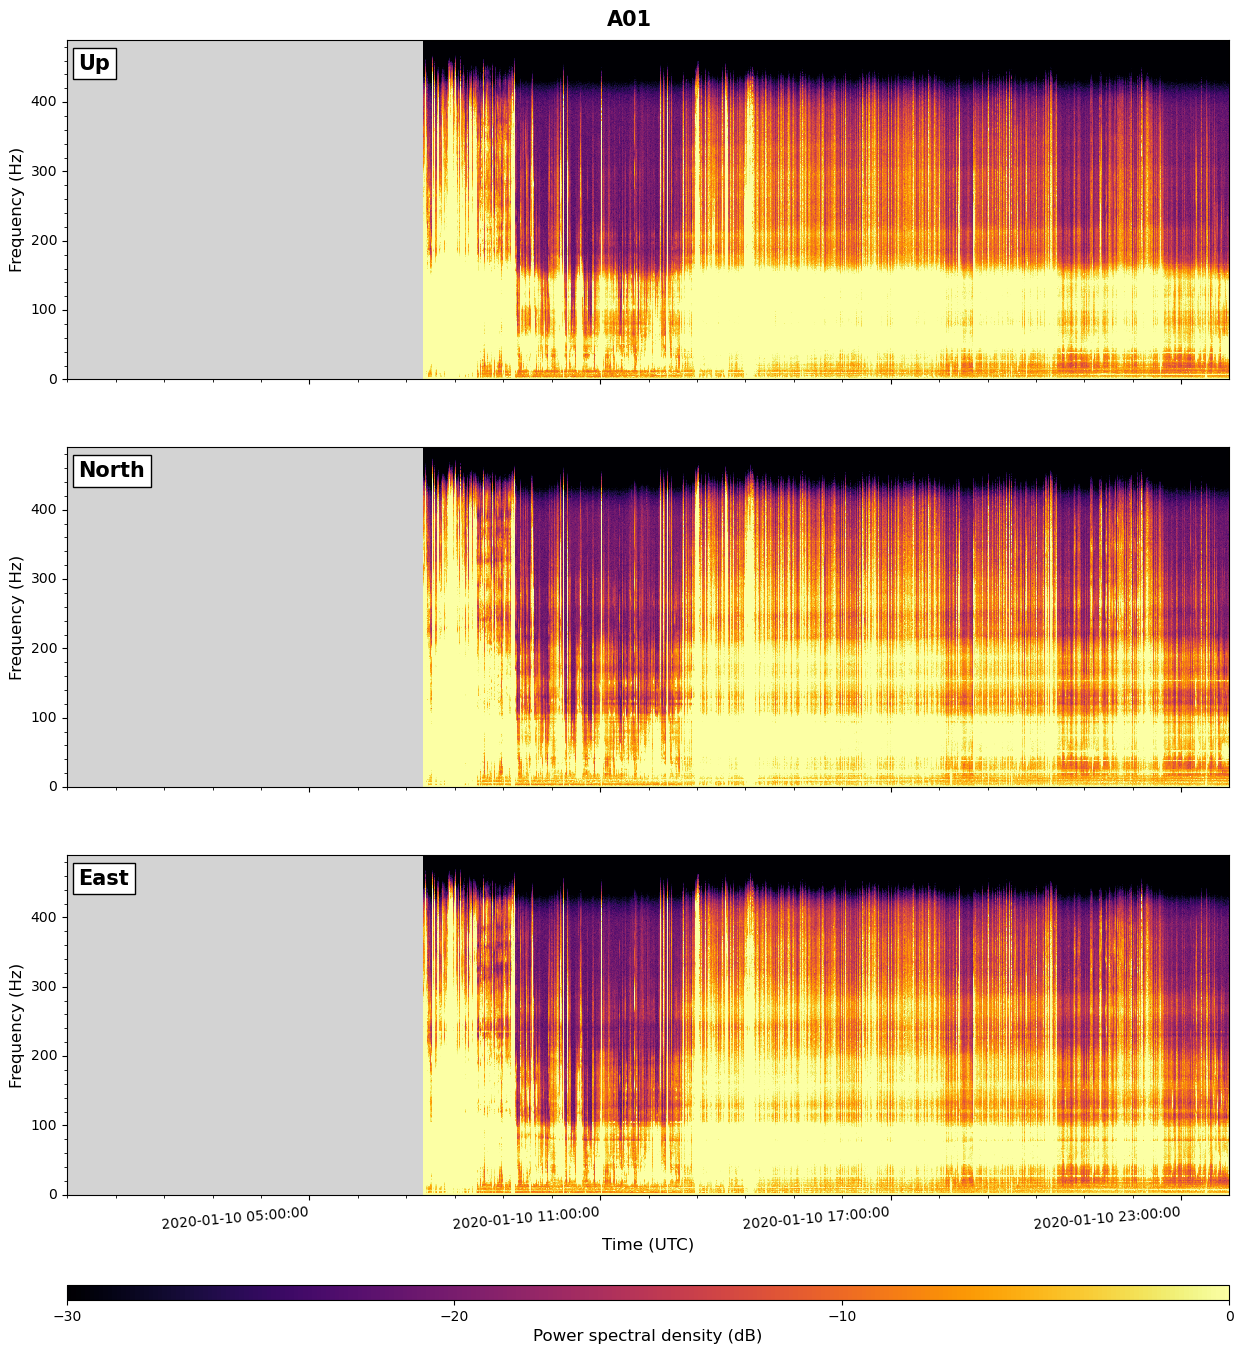

In [8]:
# Plot the spectrograms
fig, axes, cbar = plot_geo_stft_spectrograms(stream_spec_ds, date_format = "%Y-%m-%d %H:%M:%S", major_time_spacing = "6h", minor_time_spacing = "1h", time_tick_rotation = 5.0)

In [9]:
stream_spec[1].time_interval

Timedelta('0 days 00:01:00')